In [1]:
pl.scatter(data_pandas["quality"], data_pandas["frictional dp"])
pl.scatter(quality, dp_dz, color = 'red')


NameError: name 'pl' is not defined

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as pl


#Importning Data
data_two = np.load('trainData.npy')
data2 = pd.DataFrame(data_two)

# normalise 

# 0 = quality 
# 1 = roughness
# 2 = mass flux
# 3 = reynolds number 
# 4 = frictional pressure drop (kPa / m)


#renaming of the columns 
data_pandas = pd.DataFrame(data_two)
data_pandas.rename(columns = {0:'quality',1:"roughness",2:"mass flux (G)",3:"R",4:'frictional dp'}, inplace = True)

# data_pandas_A = data_pandas[:174]
# pl.scatter(data_pandas_A["quality"], data_pandas_A["frictional dp"])

data_pandas.describe()




,quality,roughness,mass flux (G),R,frictional dp
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,0.480645,1.069738,157.191397,3461.516287,34.760039
std,0.234502,0.625544,32.753959,4305.109720,32.458312
min,0.000064,0.400000,139.000000,197.272946,0.978544
25%,0.304000,0.860000,143.000000,1304.621957,10.373609
50%,0.462200,0.860000,145.000000,2168.940620,20.135134
75%,0.650800,1.290000,147.000000,3920.588758,54.896660
max,0.999400,2.560000,242.000000,50739.243550,152.464218


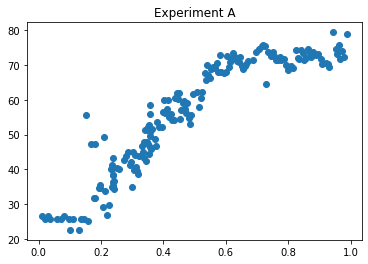

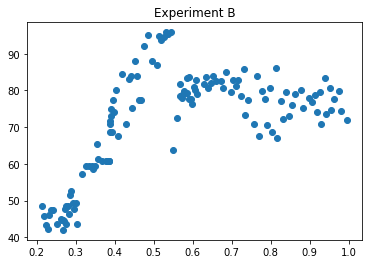

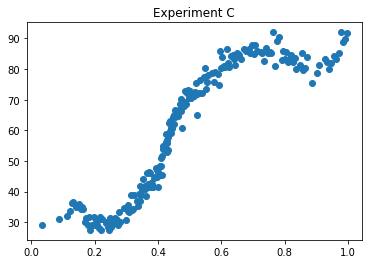

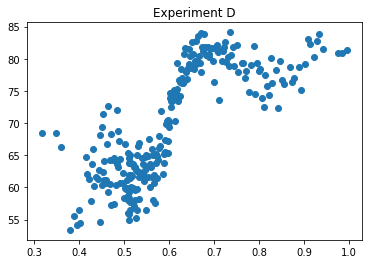

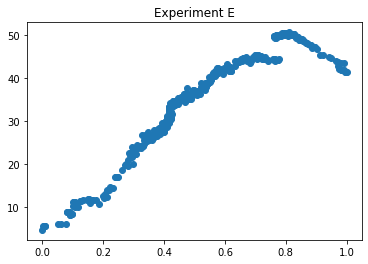

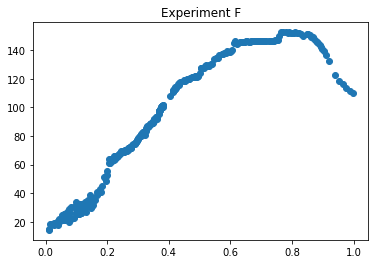

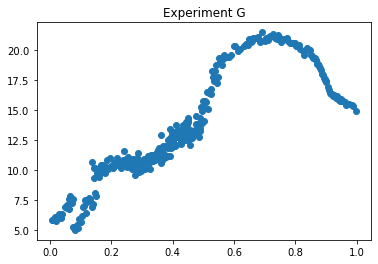

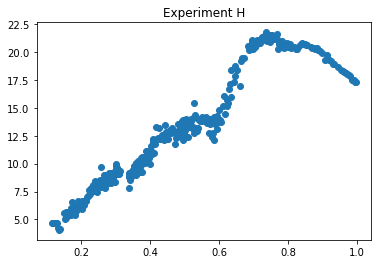

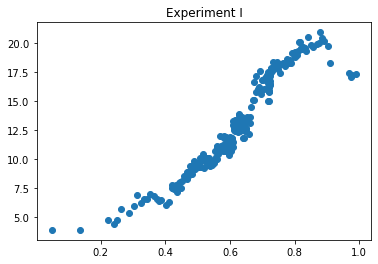

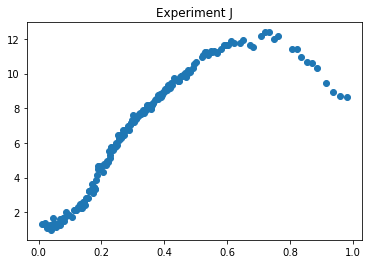

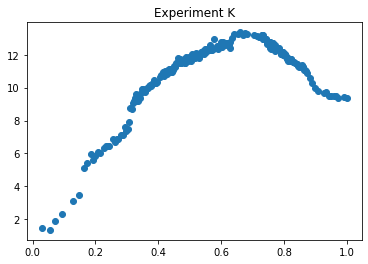

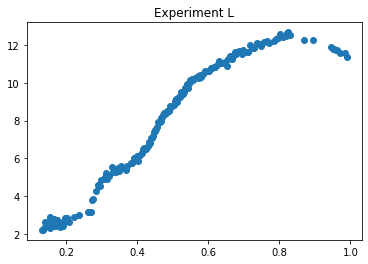

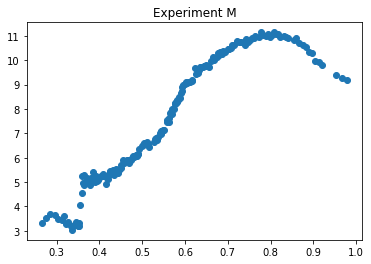

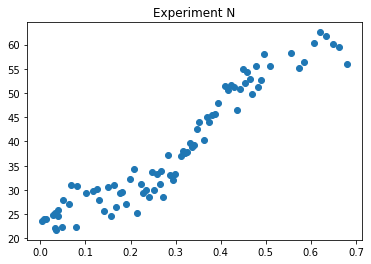

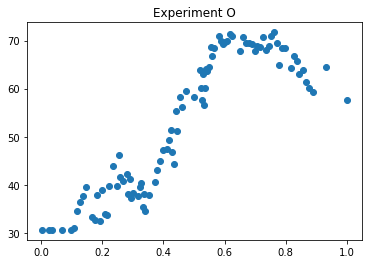

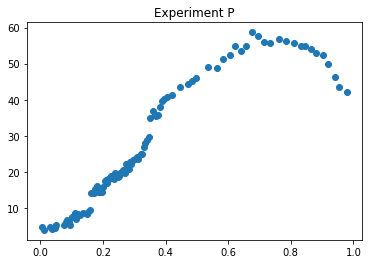

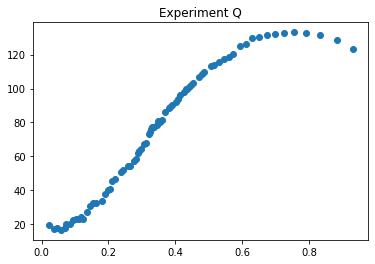

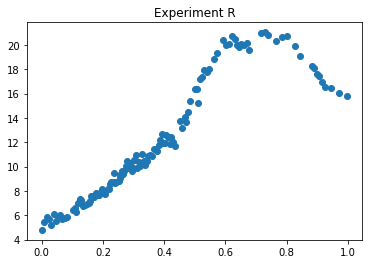

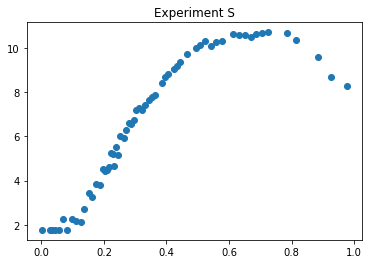

,quality,roughness,mass flux (G),R
0,0.000404,1.5,525.567,140273


In [5]:
#Splitting Data into the experiment that the data was collected in
experiment = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R","S"]
brackets = [184,134,214,255,468,355,340,400,254,179,220,189,193,85,96,98,76,127,62]

counter = 0
counter1 = 0
track = 0

#splitting of the data into experiments 
data = {}
for i in brackets:
    counter1 += i
    plot_pandas = data_pandas[counter:counter1]
    counter += i
    
    #plotting of the data
    pl.scatter(plot_pandas["quality"], plot_pandas["frictional dp"])
    pl.title(f'Experiment {experiment[track]}')
    pl.show()
    data[experiment[track]] = pd.DataFrame(plot_pandas)
    track +=1
    

# data["A"]["quality"]
# d = {}
# for name in companies:
#     d[name] = pd.DataFrame()

#Inputting BOC Values 
BOC_Values = ({"quality":[0.000404], "roughness":[1.5], "mass flux (G)": [525.567], "R":[140273]})
BOC_Values = pd.DataFrame(BOC_Values)
BOC_Values



In [6]:
#Fluid data (NIST data)
fluid_dictionary = {}
fluid_keys = ('Temperature', 'Pressure', 'liquid density', 'vapour density', 'liquid viscosity', 'vapour viscosity')
oxygen_data =(90.18, 101325,1140.7,4.477,1.958*10**-4,6.85*10**-6)
ethylene_data = (169.4,101325,567.9,2.09,1.756*10**-4,6.03*10**-6)
fluid_dictionary = dict.fromkeys(fluid_keys)


counter = 0
for i in fluid_dictionary:
    fluid_dictionary[i] = oxygen_data[counter], ethylene_data[counter]
    counter += 1
    
#oxygen code = 0, ethylene code = 1
#calling data 
print(fluid_dictionary.get("Temperature")[0])
fluid_dictionary.keys()





90.18


dict_keys(['Temperature', 'Pressure', 'liquid density', 'vapour density', 'liquid viscosity', 'vapour viscosity'])

Cicitti Homogenous two phase pressure drop correlation 

dp/dz = 2 * f2ph * G^2 / (ID * ρ(mix) )
f2ph = 2 * ((8/RE)^12 = 1 / (a + b)^1.5)^16





0.17329219645034935

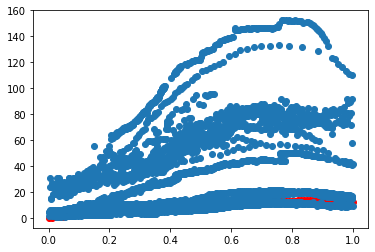

In [7]:
# # testing emprical correlations as benchmark: use of a homogenous flow model (Cicitti et al. model) 
#     #the second homogenous flow model uses a different u2ph model (7)
    
# import matplotlib.pyplot as pl
    
# def homogenous_flow(fluid, G, ID, roughness,length):
#     if fluid == 'oxygen':
#         code = 0
#     if fluid == 'ethylene':
#         code = 1 
    
#     data_for_dp = {}
#     #mixture viscosity 
#     counter = 0
#     u2ph = []
#     BOC_quality = 0.00404 
#     BOC_u2ph = (1 - BOC_quality)*fluid_dictionary['liquid viscosity'][code] + BOC_quality*fluid_dictionary['vapour viscosity'][code]
    
    
#     while counter <= 1.0001:
#         u = (1 - counter)*fluid_dictionary['liquid viscosity'][code] + counter*fluid_dictionary['vapour viscosity'][code]
#         u2ph.append(u)
# #         print(u)
#         counter += 0.01
# #         print(counter)
        
        
#     Re = []
#     BOC_re = G * ID/BOC_u2ph
    
#     for i in u2ph:
#         R = G * ID/i
#         Re.append(R)

    
#     a = []
#     b = []
#     BOC_a = (2.457 * np.log(1/ ((7/BOC_u2ph)**0.9 + 0.27 * roughness) ))**16
#     BOC_b = float(37530 * BOC_re **(-1))**16
    
#     counter = 0
#     for R in Re:
#         A = (2.457 * np.log(1/ ((7/u2ph[counter])**0.9 + 0.27 * roughness) ))**16
#         a.append(A)
#         counter += 1

        
#         B = float(37530 * R **(-1))**16
#         b.append(B)
        
#     f2ph = []
#     BOC_f2ph = 2 * ((8/BOC_re)**12 + (BOC_a + BOC_b)**(-1.5))**(1/12)
    
#     counter = 0
#     for R in Re:
#         f2ph1 = 2 * ((8/R)**12 + (a[counter] + b[counter])**(-1.5))**(1/12)
#         f2ph.append(f2ph1)
        
#         counter += 1

        
#     p_mix = []
#     BOC_p = (BOC_quality/fluid_dictionary['vapour density'][code]+(1-BOC_quality)/fluid_dictionary['liquid density'][code])**(-1)
    
#     counter = 0
#     while counter <= 1.0001:
#         p_mix1 = (counter/fluid_dictionary['vapour density'][code]+(1-counter)/fluid_dictionary['liquid density'][code])**(-1)
#         counter += 0.01
#         p_mix.append(p_mix1)
        
#     dp_dz = []
#     BOC_dp_dz = 2 * BOC_f2ph * G **2 / (ID * BOC_p)/1000
    
#     counter = 0
#     for i in f2ph:
#         dp = 2 * i * G **2 / (ID * p_mix[counter])/1000
#         dp_dz.append(dp)
#         counter += 1
        
#     quality = list(range(101))
#     for i in quality:
#         quality[i] = i/100
     
# #     pl.scatter(data_pandas["quality"],data_pandas["frictional dp"])
#     pl.scatter(quality, dp_dz, color = "red")
#     pl.scatter(data_pandas["quality"], data_pandas["frictional dp"])

    
#     return BOC_dp_dz      
                
    
# #fluid = ethylene or oxygen     
# homogenous_flow('oxygen', 525, 0.021,0.86,1)




In [8]:

#Modellig of PINNS Model for Loss function
def homogenous_flow_data_pandas(fluid, df: pd.DataFrame, ID, length):
    global new_data
    if fluid == 'oxygen':
        code = 0
    if fluid == 'ethylene':
        code = 1 
    
    data_for_dp = {}
    

    counter = 0
    df["u"] = pd.Series(dtype = 'int')    
    counter = 0
    
    #viscosity (u) calculation
    for row in df["quality"]:
        u = (1 - row)*fluid_dictionary['liquid viscosity'][code] + row*fluid_dictionary['vapour viscosity'][code]
        df["u"].iloc[counter] = u
        counter +=1
        
    df["a"] = pd.Series(dtype = 'int') 
    df["b"] = pd.Series(dtype = 'int') 
    

    
    #(dp/dz)L and (dp/dx)V calculation
    counter = 0
    for row in df["u"]:      
        A = (2.457 * np.log(1/ ((7/row)**0.9 + 0.27 * df["roughness"].iloc[counter]) ))**16
        df["a"].iloc[counter] = A
        B = float(37530 * df["R"].iloc[counter] **(-1))**16
        df["b"].iloc[counter] = B
        
        counter += 1
        

    #two phase friction factor (fL) calculation
    counter = 0
    df["f2ph1"] = pd.Series(dtype = 'int') 
    for row in df["R"]:
        f2ph1 = 2 * ((8/row)**12 + (df["a"].iloc[counter] + df["b"].iloc[counter])**(-1.5))**(1/12)
        df["f2ph1"].iloc[counter] = f2ph1
        
        counter += 1

    
    #fluid mixed density (ρH) calculatio
    counter = 0
    df["p_mix"] = pd.Series(dtype = 'int') 
    
    for row in df["quality"]:
        
        p_mix1 = (row/fluid_dictionary['vapour density'][code]+(1-row)/fluid_dictionary['liquid density'][code])**(-1)
        
        df["p_mix"].iloc[counter] = p_mix1
        counter += 1
        
        
    #frictional pressure drop (dp/dz) calculation
    df["model_dp_dz"] = pd.Series(dtype = 'int') 
    counter = 0
    for row in df["f2ph1"]:
        dp = 2 * row * df["mass flux (G)"].iloc[counter] **2 / (ID * df["p_mix"].iloc[counter])/1000
        df["model_dp_dz"].iloc[counter] = dp
        counter += 1 
    
    #model values saved into database 
    new_data = df
    
    return     
                
#calling of the function, using oxygen fluid properties     
#fluid = ethylene or oxygen     
homogenous_flow_data_pandas('oxygen',data_pandas, 0.021,1)



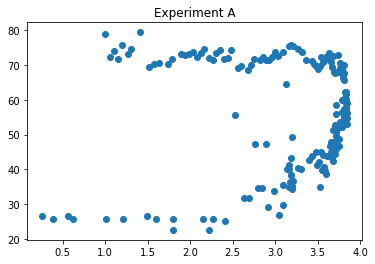

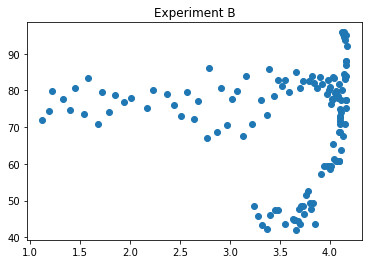

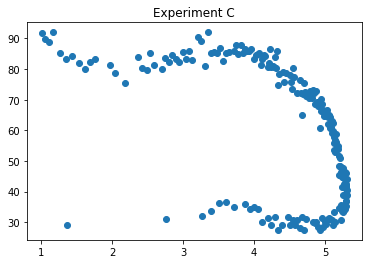

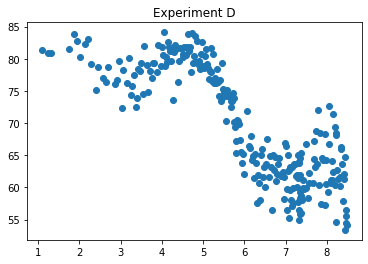

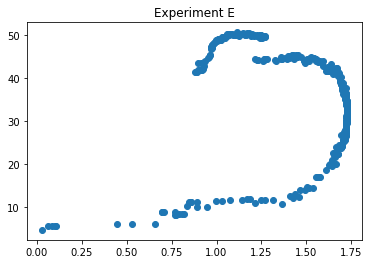

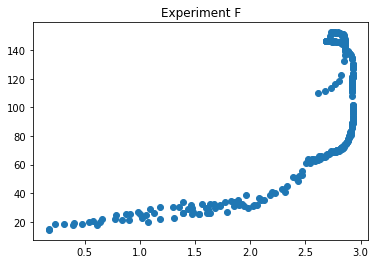

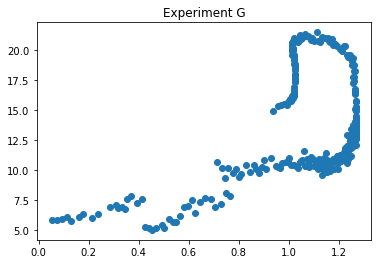

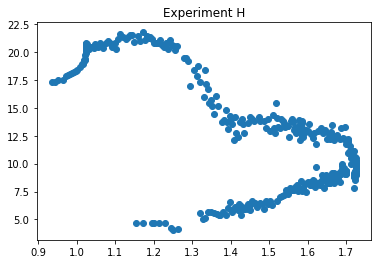

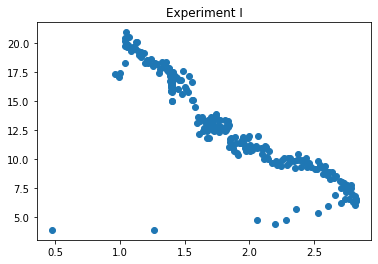

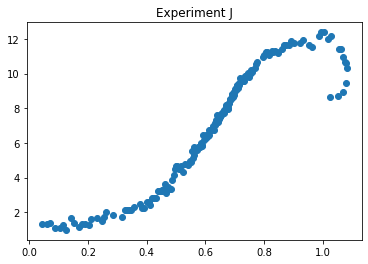

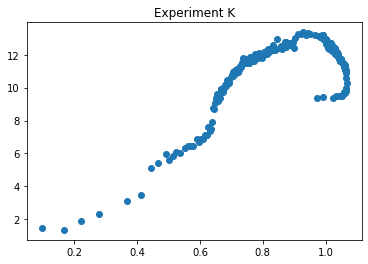

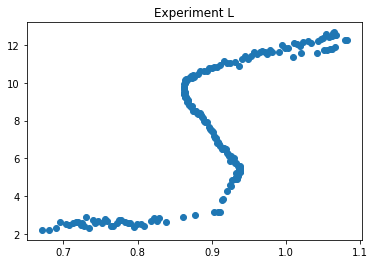

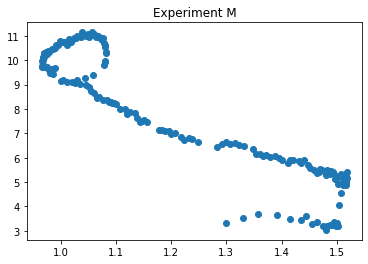

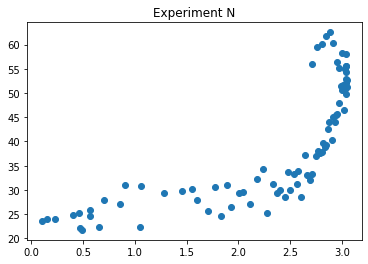

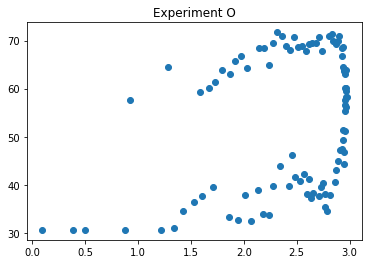

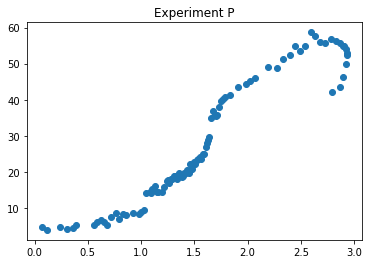

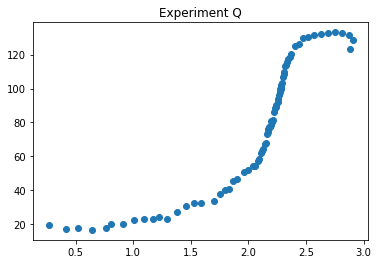

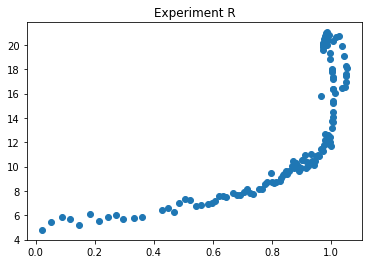

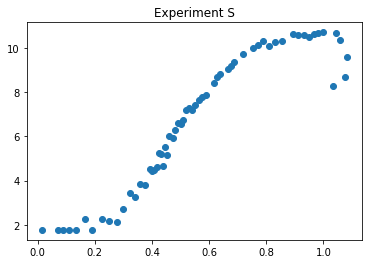

In [9]:
#removal of uneeded data
new_data.drop(["u", "a", "b", "f2ph1", "p_mix"], axis = 1, inplace = True)


#splitting of experiments 
experiment = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R","S"]
brackets = [184,134,214,255,468,355,340,400,254,179,220,189,193,85,96,98,76,127,62]

counter = 0
counter1 = 0
track = 0

data1 = {}
for i in brackets:
    counter1 += i
    plot_pandas = new_data[counter:counter1]
    counter += i
    pl.scatter(plot_pandas["model_dp_dz"], plot_pandas["frictional dp"])
    pl.title(f'Experiment {experiment[track]}')
    

    pl.show()
    data1[experiment[track]] = pd.DataFrame(plot_pandas)
    track +=1
    


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score 
from sklearn.tree import DecisionTreeRegressor




In [12]:
#    custom loss function creation, note that y_true is defined as the 
#    'homogenous_flow_data_pandas' function, so that the loss functuin 
#     aims to minimise predicted valyes from the two-phase pressure drop prediction

import tensorflow as tf

def custom_loss(y_true, y_pred):

    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    return mse_loss


In [127]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import callbacks
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError




# training = data["A"],data["B"],data["C"], data["D"], data["E"], data["F"], data["G"], data["H"],data["I"], data["J"], data["K"], data["L"], data["M"] 
training = data1["A"],data1["B"],data1["C"], data1["D"], data1["E"], data1["F"], data1["G"],data1["H"], data1["J"], data1["K"], data1["M"], data1["O"]

#putting the experimental data back together, so that the trained data can be trained on all data
train = pd.concat(training)

#test train split -> 0.15 test to 0.85 train ratio 
X_train1, X_test1, y_train1, y_test1 = train_test_split(train.drop(["frictional dp", "model_dp_dz"],axis = 1), train["model_dp_dz"] , test_size=0.15, random_state=3)


#standardisation of data 
#need to also have the same scaling of the BOC inputs, so append to scaled list 
test = X_train1.append(BOC_Values)


ss = StandardScaler()
x_train_scaled  = ss.fit_transform(X_train1)
x_test_scaled  = ss.transform(X_test1)
BOC_scaled = ss.transform(test)

#     separation of the BOC data, so that it is not used to train! very important, as don't 
#     want the model to 'see' the BOC data, to remove any chance of model bias 
BOC_scaled = BOC_scaled[-1:,:]



# Define 4 hidden layers for the ANN model, with 16 neurons each and ReLU activation
hidden_units1 = 300
hidden_units2 = 300
hidden_units3 = 300
hidden_units4 = 300
hidden_units5 = 300


learning_rate = 0.01
callback = callbacks.EarlyStopping(monitor='loss', patience=1)


#Model construction 
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(.5),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(.5),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dropout(.5),
    Dense(hidden_units4, kernel_initializer='normal', activation='relu'),
    Dropout(.6),

    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model


#Model construction
model = build_model_using_sequential()

# loss function
msle = MeanSquaredLogarithmicError()

model.compile(loss=custom_loss, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

history = model.fit(x_train_scaled,y_train1, epochs=100,batch_size=100, callbacks=[callback], validation_split=0.4)   


model_loss = model.evaluate(x_train_scaled,y_train1, verbose = 1)
print(f'model accuracy {model_loss}')
a = len(history.history['loss'])
print(f'epocs {a}')



Epoch 1/100


C:\Users\teddi\AppData\Local\Temp\ipykernel_12204\3678398897.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = X_train1.append(BOC_Values)


16/16 [==============================] - 2s 30ms/step - loss: 6.2731 - mean_squared_logarithmic_error: 0.6616 - val_loss: 1.4892 - val_mean_squared_logarithmic_error: 0.0986
Epoch 2/100
16/16 [==============================] - 0s 19ms/step - loss: 1.5880 - mean_squared_logarithmic_error: 0.1052 - val_loss: 0.8424 - val_mean_squared_logarithmic_error: 0.0516
Epoch 3/100
16/16 [==============================] - 0s 23ms/step - loss: 1.1302 - mean_squared_logarithmic_error: 0.0714 - val_loss: 0.2888 - val_mean_squared_logarithmic_error: 0.0235
Epoch 4/100
16/16 [==============================] - 0s 21ms/step - loss: 0.8062 - mean_squared_logarithmic_error: 0.0510 - val_loss: 0.6352 - val_mean_squared_logarithmic_error: 0.0357
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.2816 - mean_squared_logarithmic_error: 0.0218
model accuracy [0.2816353142261505, 0.021755553781986237]
epocs 5


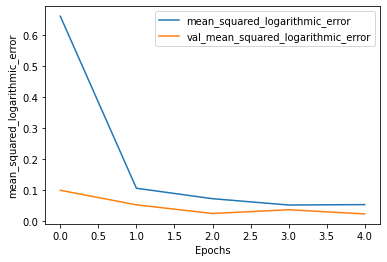

In [128]:
#looking at the model error, at each Epoch

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

# 
# plt.plot()

In [171]:
#testing the model predicted values, verses the real values 
predictions = []
real_values = []
# prediction_values = pd.DataFrame()

predictions = model.predict(x_test_scaled, batch_size=100, verbose="auto", steps=None, callbacks=None)
prediction_values = predictions.tolist()
real_values = y_test1.tolist()


correct = []
ten_above = []
ten_below = []
number = int(round(max(real_values),0))    

for i in range(number):
    correct.append(i)
    ten_above.append(i*1.10)
    ten_below.append(i*0.9)


#plotting of the data 
plt.figure(figsize = (8,6), dpi = 1500)
plt.plot(correct,correct, linestyle = 'dashed', c = 'black')
plt.plot(correct,ten_above, linestyle = 'dashed', c = 'black')
plt.plot(correct,ten_below, linestyle = 'dashed', c = 'black')
plt.scatter(predictions, real_values, facecolors = 'none', edgecolors = 'lightcoral', )
plt.xlabel("Predicted Values")
plt.ylabel("Real Values")
plt.grid(axis = 'y', linestyle = 'dashed')

plt.show()
plt.savefig("C:/Users/teddi/OneDrive/Desktop/ANN_Model.png")


# plt.scatter(350,3995)

#MARD calculaton 

values = []
for i in range(len(predictions)):
    v = abs((predictions[i] - real_values[i]) / real_values[i])
    values.append(v[0])

z = sum(values)
MARD = (1/len(values) * z)*100
print(f' the MARD for the ANN model is {MARD}')



5/5 [==============================] - 0s 8ms/step


 the MARD for the ANN model is 24.978671319174854


<Figure size 432x288 with 0 Axes>

In [130]:
#modelling on f

#     testing completely 'unseen data', to further confirm versatility of the model,
#     this is expected to have a greater error, as there was no  test-train split on experiment "I"

testing = data1["I"]
X_test2 = testing.drop(columns = ["model_dp_dz","frictional dp"]).to_numpy()
y_test2 = testing["model_dp_dz"].to_numpy()

x_test_scaled2  = ss.transform(X_test2)


#predicted vs real values 
predictions2 = model.predict(x_test_scaled2, batch_size=100, verbose="auto", steps=None, callbacks=None)
prediction_values2 = pd.DataFrame(predictions2, columns = ["predictions"])
real_values2 = pd.DataFrame(y_test2, columns=["Real Values"])




3/3 [==============================] - 0s 9ms/step


C:\Users\teddi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


 the MARD for the ANN model is 18.190718784890738


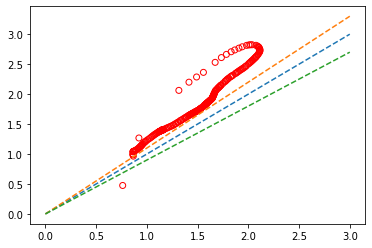

In [131]:
#plotting of real vs model predicted valyes 
to_plot_f = pd.concat((prediction_values2, real_values2), axis = 1)
plt.scatter(to_plot_f["predictions"],to_plot_f["Real Values"], facecolors = 'none', edgecolors = 'r')

number = int(max(to_plot_f["predictions"]))+ 2

plt.plot(correct[0:number],correct[0:number], linestyle = 'dashed')
plt.plot(correct[0:number], ten_above[0:number], linestyle = 'dashed')
plt.plot(correct[0:number], ten_below[0:number], linestyle = 'dashed')
number

values = []
for i in range(len(to_plot_f)):
    v = abs((to_plot_f["predictions"][i] - to_plot_f["Real Values"][i]) / to_plot_f["Real Values"][i])
    values.append(v)

z = sum(values)
MARD = (1/len(values) * z)*100
print(f' the MARD for the ANN model is {MARD}')



In [132]:
#BOC prediction 

BOC_prediction = model.predict(BOC_Values,batch_size=10, verbose="auto", steps=None, callbacks=None)

#atm to 
BOC_prediction = BOC_prediction/(1000)
BOC_prediction_values = pd.DataFrame(BOC_prediction, columns = ["predictions"])

print(f' the predicted BOC frictional (dp/dx) for the ANN model is {BOC_prediction_values}')



1/1 [==============================] - 0s 79ms/step
 the predicted BOC frictional (dp/dx) for the ANN model is    predictions
0     0.915308
